In [ ]:
# 8월 29일

# KModes
- 이용자들을 비슷한 성향끼리 분류할 수 있음
- 비지도학습에 해당됨
- Clustering
- 모든 데이터가 범주형이어야 함(범주형 데이터에 적용 가능)
- 반면에 KMeans는 연속형(수치형) 데이터에 적용 가능
- 같지 않음을 가지고 비교
- 숫자로 치환해 뺄셈 적용 =>  다르면 1, 같으면 0 (0-0은 0이라서 차이 구분이 불가하니 다르면 1을 주는 것)
- 숫자가 클수록 비유사도가 크고 값이 0이면 같다는 의미 (항목별로 합산을 해 총 비유사도를 구함)
- 비유사도를 계산하여 클러스터를 구성함
- K: 클러스터의 수(사람이 지정)
- Modes: **최빈값**(빈도수가 가장 높은 값/데이터셋 내에서 가장 많이 발견되는 값)
- 수치 데이터가 아니라서 평균을 못 찾는 것이고 최빈값을 찾는 것임(최빈값을 찾기 위해 위치를 바꿔감- new leader 찾음)
- 최빈값이 바뀔 때마다 비유사도를 다시 계산[갱신]해 mode(최빈값)를 다시 찾음 
   <br> => KMeans가 거리를 다시 계산해 평균(mean)에 해당되는 진짜 centroid를 찾아가는 것과 동일
   <br> => 비교시 최빈값이 없이 동률만 있으면 무작위로 중심값(leader)이 결정됨 
   <br> => 최빈값은 행이나 데이터와 관계 없고 데이터내에서 없기도 함
   <br> => leader가 안 바뀔 때까지 new leader와 클러스터의 값들이 사로 비교 작업 반복
- 클러스터가 구성되면 다시 최빈값을 추출하여 Leader를 구성한다
- 새로 구성된 Leader와 데이터들 간의 비유사도를 계산하여 다시 클러스터 구성
- 위의 2개 과정을 반복하여 Leader가 더 이상 변경되지 않을 때까지 반복함

In [ ]:
# 비지도학습, KModes Clustering (아나콘다에 미설치/별도 설치 필요 
# => 아나콘다 프롬프트에서 pip install kmodes 입력 후 엔터치면 설치됨 

In [3]:
# KModes 모듈 설치 / 아나콘다 프롬프트 아니어도 셀에서 이렇게 설치해도 됨. 단 모듈행 써 있는 곳에 주석 있으면 안 됨
!pip install kmodes  

In [3]:
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
import pandas as pd
import numpy as np

In [6]:
data = np.array([['A', 'B', 'C'],
                 ['A', 'B', 'A'],
                 ['A', 'A', 'B'],
                 ['A', 'A', 'C'],
                 ['B', 'B', 'B'],
                 ['B', 'B', 'C'],
                 ['B', 'B', 'A'],
                 ['C', 'A', 'B'],
                 ['C', 'A', 'C'],
                 ['C', 'C', 'A']])
data

array([['A', 'B', 'C'],
       ['A', 'B', 'A'],
       ['A', 'A', 'B'],
       ['A', 'A', 'C'],
       ['B', 'B', 'B'],
       ['B', 'B', 'C'],
       ['B', 'B', 'A'],
       ['C', 'A', 'B'],
       ['C', 'A', 'C'],
       ['C', 'C', 'A']], dtype='<U1')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 17.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 17.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 17.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 17.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 17.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 12.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration

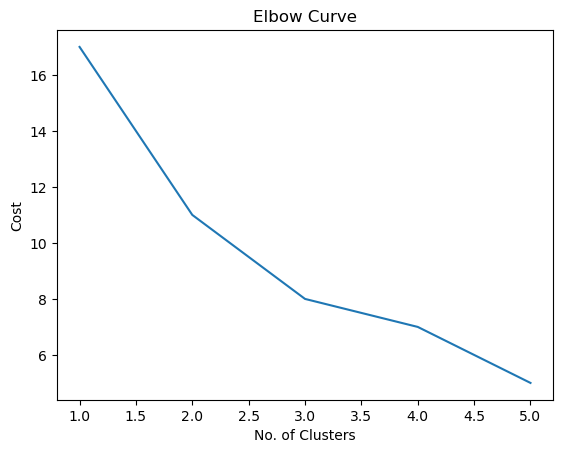

In [10]:
# 엘보우 차트(최적의 K를 찾는 과정)
cost = []
K = range(1,6) #  KModes 알고리즘을 각각 다른 클러스터 개수로 실행하기 위해 사용
for k in list(K): # 반복문을 통해 K의 각 값을 순회. list(k)를 사용하여 범위 객체 K를 리스트로 변환
    km = KModes(n_clusters=k, init='random', n_init=5, verbose=1)  #  KModes 객체를 생성
# n_clusters 매개변수에는 현재 순회 중인 클러스터 개수인 k가 전달. 
# init='random' => 초기화 방법으로 무작위 초기화를 사용함을 의미
#  n_init=5는 알고리즘을 5번 실행하여 최적의 결과를 선택하도록 한 것
# verbose=1은 실행 과정에서 상세한 출력 정보를 표시하도록 설정
    clusters = km.fit_predict(data)
    
    cost.append(km.cost_)
    
plt.plot(K, cost)    # K => range 오브젝트  # cost => 모델에서 나온 y값
plt.xlabel('No. of Clusters')
plt.ylabel('Cost') 
plt.title('Elbow Curve')
plt.show()

In [ ]:
# verbose=0과 verbose=1의 차이
# verbose=0은 KModes 알고리즘 실행 시 출력되는 정보의 양을 조절하는 매개변수. verbose 값에 따라 출력 레벨이 변경됨.

# verbose=0: 출력 없음. 알고리즘 실행 도중 어떤 정보도 표시하지 않음.
# verbose=1: 기본값. 실행 도중 진행 상황과 클러스터링 결과에 대한 간단한 정보를 표시.
# 일반적으로 verbose=1을 사용하면 알고리즘이 진행되는 동안 유용한 정보를 확인할 수 있음. 
# 예를 들어, 각 클러스터링 단계에서 할당된 클러스터 번호, 비용 값, 반복 횟수 등이 출력됨.

# 반면에 verbose=0으로 설정하면 출력이 제거되므로 실행 과정에서의 추가 정보를 확인할 수 없게 됨. 
# 이는 대규모 데이터셋이나 반복 횟수가 많은 경우에 유용할 수 있음.

In [11]:
# 엘보우 차트에서 보여준 적절한 K값(2)를 적용하여 KModes를 학습한다
km = KModes(n_clusters=2, init='random', n_init=5, verbose=0)
clusters = km.fit_predict(data)
clusters

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1], dtype=uint16)

In [14]:
km.predict(data[4].reshape(1,-1))  # 다섯번째 학습된 데이터를 2 차원으로 만들어 어느 그룹인지 값 확인

array([1], dtype=uint16)

In [15]:
km.predict(data[8].reshape(1,-1)) 

array([0], dtype=uint16)

In [20]:
# 학습된 데이터가 어느 그룹에 속하는지 분류한 내용이 보이게 데이터프레임 만들기

df=pd.DataFrame(data, columns=['x1','x2','x3'])
df['Cluster']=clusters
df

,x1,x2,x3,Cluster
0,A,B,C,0
1,A,B,A,1
2,A,A,B,0
3,A,A,C,0
4,B,B,B,1
5,B,B,C,1
6,B,B,A,1
7,C,A,B,0
8,C,A,C,0
9,C,C,A,1


In [ ]:
# 질문]
'''
data = np.array([['A', 'B', 'C'],
                 ['A', 'B', 'A'],
                 ['A', 'A', 'B'],
                 ['A', 'A', 'C'],
                 ['B', 'B', 'B'],
                 ['B', 'B', 'C'],
                 ['B', 'B', 'A'],
                 ['C', 'A', 'B'],
                 ['C', 'A', 'C'],
                 ['C', 'C', 'A']])
data


km = KModes(n_clusters=2, init='random', n_init=5, verbose=0)
clusters = km.fit_predict(data)
clusters
'''

# => 여기서 x값들이 A,B,C가 되는 거죠? clusters가 y값이 되고요?


# 답변]
'''
네, 맞습니다. 제시된 코드에서 data는 X값(데이터)이고, clusters는 Y값(클러스터 할당 결과)입니다.

data: 배열 형태로 표현된 데이터입니다. 
각 행은 개별 데이터 포인트를 나타내며, 열은 해당 데이터 포인트의 특성을 나타냅니다. 
여기서는 'A', 'B', 'C' 세 가지 카테고리로 구성된 범주형 데이터가 사용되었습니다.
km = KModes(n_clusters=2, init='random', n_init=5, verbose=0): KModes 객체를 생성합니다. 
n_clusters=2는 클러스터 개수를 2개로 설정하였으며, init='random'은 초기화 방법으로 무작위 초기화를 사용합니다. 
n_init=5는 알고리즘을 5번 실행하여 최적의 결과를 선택하도록 합니다. 
마지막으로 verbose=0으로 설정하여 출력 정보가 표시되지 않도록 합니다.
clusters = km.fit_predict(data): KModes 알고리즘을 사용하여 데이터에 대한 클러스터 할당을 수행합니다. 
이 때, 입력 데이터인 data에 대해 각 데이터 포인트가 어떤 클러스터에 속하는지 예측한 결과를 반환하며, 
이 값들이 변수 clusters에 저장됩니다.
따라서 여기서 X값은 'A', 'B', 'C'와 같은 범주형 데이터이며, Y값은 각 데이터 포인트의 클러스터 할당 결과입니다.
''''''



# DBSCAN(Density-Based Spatial Clustering of Applications with Noise)
- core point: 주어진 반경(epsilon)의 원 안에 지정된 개수의 데이터를 가지는 데이터
<br> 밀도가 끊어질 때까지 core point 찾음
- epsilon : 반경
- minPts : 원 안에 들어와야 할 최소의 점 개수. epsilon 반경을 가진 원 안에 존재해야 할 최소의 데이터 수
- border point: 클러스터 안에는 포함되지만 core point가 아닌 데이터 
- noise : 어떤 클러스터에도 포함되지 않는 데이터

- DBSCAN은 밀도 기반의 공간 클러스터링 알고리즘. 
- 데이터 포인트들이 밀도가 높은 지역에 속한 경우 같은 클러스터로 그룹화하고(반경 기반으로 같은 밀도로 그룹화), 
<br>비교적 낮은 밀도를 가진 지역을 경계로 하여 다른 클러스터로 구분. 
<br>이 알고리즘은 데이터의 분포에 따라 유연하게 클러스터를 찾을 수 있으며, 
<br>이상치(outlier)에 대해서도 강건한 성능을 보임.

- DBSCAN 알고리즘의 동작 방식:
<br>임의의 데이터 포인트를 선택.
<br>선택한 데이터 포인트에서 일정 거리(epsilon) 내에 있는 다른 데이터 포인트들을 찾음.
<br>만약 해당 거리 내에 최소 개수(min_samples) 이상의 데이터 포인트가 있다면, => 사람이 지정(MinPts => MinPoints를 의미)
<br>해당 데이터 포인트와 그 주변에 있는 모든 점들을 하나의 클러스터로 할당.
<br>선택한 데이터 포인트 주변에 최소 개수(min_samples)보다 적은 개수의 데이터 포인트가 있다면, 
<br>이는 경계점(border point)으로 처리되며 어떤 클러스터에도 속하지 않음.
- 위 과정을 반복하여 모든 데이터 포인트를 탐색하고, 모든 점들이 클러스터링될 때까지 진행.
- DBSCAN 알고리즘은 입력으로 epsilon(거리 범위)와 min_samples(최소 점 개수)라는 두 가지 매개변수를 필요로 함. 
- epsilon(반경) 매개변수는 한 점에서 다른 점까지의 거리를 정의하며, min_samples 매개변수는 한 점 주변에서 구성하는 최소 개수.
<br> => 클러스터(Cluster)내의 epsilon(반경) 매개변수 => 사람이 정의해줌 / 코어 포인트(Core point) 결정에 기여
<br> => Core point가 안 되면 Border point가 됨 
<br> => 클러스터 밖에 있으면 Noise로 봄
<br> => Core point가 될 수 있는지 지속 반복하게 됨
- DBSCAN은 밀집된 영역과 비어있는 영역을 구분할 수 있기 때문에 잡음(noise)이나 이상치(outlier) 처리에 효과적. 
- 또한 원형 형태뿐만 아니라 비선형 형태의 클러스터도 잘 찾아낼 수 있음.

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [25]:
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=1)
X.shape, y.shape

((500, 2), (500,))

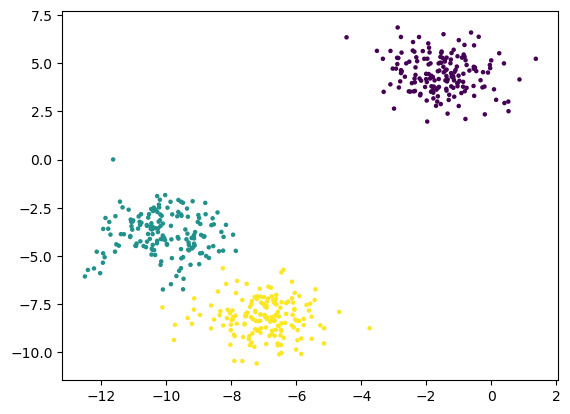

In [26]:
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.show()

In [27]:
dbscan = DBSCAN(eps=2, min_samples=5, metric='euclidean')   # eps 변경하면서 테스트
dbscan       # 객체 생성

DBSCAN(eps=2)

In [ ]:
# metric='euclidean'은 DBSCAN 알고리즘에서 사용되는 거리 측정 방법을 지정하는 매개변수.
# 여기서 'euclidean'은 유클리디안 거리(Euclidean distance)를 의미.

# 유클리디안 거리는 가장 일반적으로 사용되는 거리 측정 방법 중 하나로, 두 데이터 포인트 간의 직선 거리를 계산. 
# 유클리디안 거리는 공간에서의 물체 사이의 실제 길이를 나타내며, 
# 데이터 포인트가 숫자로 표현된 특성들로 이루어진 경우에 자주 활용됨.

# DBSCAN 알고리즘에서 metric='euclidean'을 설정하면, 
# 데이터 포인트 간의 유클리디안 거리를 기반으로 클러스터링을 수행. 
# 이렇게 설정하면 DBSCAN은 유클리디안 공간에서 데이터 포인트들 간의 밀도와 접근 가능성을 평가하여 클러스터를 형성.

# 만약 다른 거리 측정 방법을 사용하고 싶다면 metric 매개변수에 해당 거리 측정 방법의 이름을 지정할 수 있음. 
# 예를 들어, metric='manhattan'은 맨해튼 거리(Manhattan distance)를 사용함을 의미.

In [28]:
# 분류 구획에 대한 고차함수를 학습
dbscan.fit(X) 

DBSCAN(eps=2)

In [30]:
dbscan.labels_   # 학습되었는지 확인

array([ 0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0

In [32]:
pd.Series(dbscan.labels_).value_counts()   # value_counts()를 쓰기 위해 판다스로 변경

 0    332
 1    167
-1      1
dtype: int64

In [117]:
# 두 개로 분류된 위 데이터를 분류가 세 개로 되게끔 바꾸기 : 뭘 바꿀지 답은 정해지지 않음 1) min_samples의 개수를 줄여봄

dbscan = DBSCAN(eps=2, min_samples=2, metric='euclidean')   # eps 변경하면서 테스트
dbscan       # 객체 생성

DBSCAN(eps=2, min_samples=2)

In [118]:
# 분류 구획에 대한 고차함수를 학습
dbscan.fit(X) 

DBSCAN(eps=2, min_samples=2)

In [119]:
dbscan.labels_   # 학습되었는지 확인

array([ 0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0

In [120]:
pd.Series(dbscan.labels_).value_counts() 

 0    332
 1    167
-1      1
dtype: int64

In [121]:
# 두 개로 분류된 위 데이터를 분류가 세 개로 되게끔 바꾸기: 뭘 바꿀지 답은 정해지지 않음  
# 2) min_samples은 그대로 eps의 개수를 늘려봄

dbscan = DBSCAN(eps=5, min_samples=5, metric='euclidean')   # eps 변경하면서 테스트
dbscan       # 객체 생성

DBSCAN(eps=5)

In [122]:
# 분류 구획에 대한 고차함수를 학습
dbscan.fit(X) 

DBSCAN(eps=5)

In [123]:
dbscan.labels_   # 학습되었는지 확인

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [124]:
pd.Series(dbscan.labels_).value_counts()   # 이상치가 사라짐

0    333
1    167
dtype: int64

In [125]:
# 두 개로 분류된 위 데이터를 분류가 세 개로 되게끔 바꾸기 : 뭘 바꿀지 답은 정해지지 않음. 직접 테스트 해봐야 함  
# 3)eps을 0.8로, min_samples은 2로 바꿔봄

dbscan = DBSCAN(eps=0.8, min_samples=2, metric='euclidean')   # eps 변경하면서 테스트
dbscan       # 객체 생성

DBSCAN(eps=0.8, min_samples=2)

In [126]:
# 분류 구획에 대한 고차함수를 학습
dbscan.fit(X) 

DBSCAN(eps=0.8, min_samples=2)

In [127]:
dbscan.labels_   # 학습되었는지 확인

array([ 0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  0, -1,  0,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,
        0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,
        1,  1,  1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  2,  0,  0,  0,  1,  0,
        1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  0,  1,  0

In [128]:
pd.Series(dbscan.labels_).value_counts()   

 0    326
 1    163
-1      8
 2      3
dtype: int64

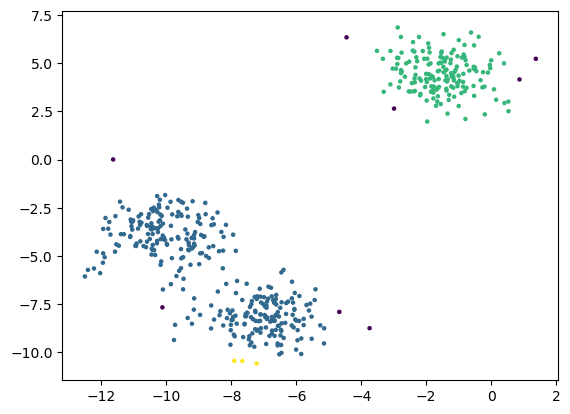

In [129]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=5)
plt.show()

In [130]:
dbscan = DBSCAN(eps=1, min_samples=10, metric='euclidean')   # eps 변경하면서 테스트
dbscan       # 객체 생성

DBSCAN(eps=1, min_samples=10)

In [131]:
# 분류 구획에 대한 고차함수를 학습
dbscan.fit(X) 

DBSCAN(eps=1, min_samples=10)

In [132]:
# 학습되었는지 결과 확인
dbscan.labels_   # 0, 1, 2 값들 확인됨

array([ 0,  0,  1, -1,  1,  2,  0,  1,  0,  1,  1,  1,  1,  2,  0,  1,  2,
        1,  2,  1,  0,  1,  0,  2,  1,  1,  2,  2,  0,  0,  0,  2,  0,  0,
        0,  0,  2,  0,  0,  2,  1,  1,  2,  1,  1,  0, -1,  1,  2,  2,  2,
        1,  1,  1, -1,  1,  0,  0,  0,  2,  2,  2,  2,  0,  2,  0,  1,  0,
        0,  1,  1,  2,  1,  0,  1,  0,  0,  1,  1,  2,  0,  2,  1,  2,  2,
        2,  2,  2,  0,  1,  2,  0,  0,  1,  2,  0,  0,  1,  0,  2,  2,  0,
        2,  2,  2,  0,  0,  2,  2,  0,  0,  0,  2,  2,  2,  2,  2,  1,  2,
        1,  1,  0,  1,  0,  1,  2,  2,  0,  0,  0,  2,  2,  0,  1,  1,  0,
        2,  1,  2,  2,  0,  0,  0,  2,  2,  2,  1,  0,  1,  1,  1,  2,  2,
        1,  2,  1,  1,  0,  0,  2,  0,  2,  2,  2,  1,  1,  1,  1,  2,  0,
        2,  0,  0,  2,  0,  1,  0,  1,  0,  1, -1,  2,  1,  0,  1,  1,  0,
        0,  1,  2,  2,  0,  1,  1,  2,  1,  0,  1,  2,  0,  2,  1,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  2,  0,  2,  1,  0,  0,
        1,  0,  0,  2,  1

In [133]:
# 세 분류 확인됨
pd.Series(dbscan.labels_).value_counts()   

 0    166
 2    164
 1    163
-1      7
dtype: int64

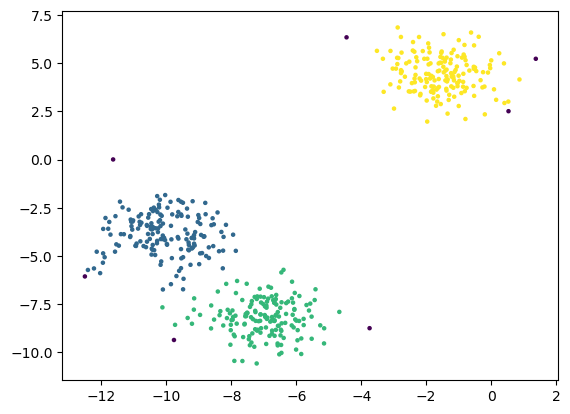

In [134]:
# 두 개로 분류된 위 데이터를 분류가 세 개로 되게끔 바꾸기 : 뭘 바꿀지 답은 정해지지 않음. 직접 테스트 해봐야 함  

# 강사님 버전
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=5)
plt.show()   # 이 차트처럼 완전히 떨어진 것이 아닌 선으로 나눠지는 것들이 있으면 KModes보다 KMeans로 분류해야 함
# 지금은 DBSCAN을 배우고자 해본 것

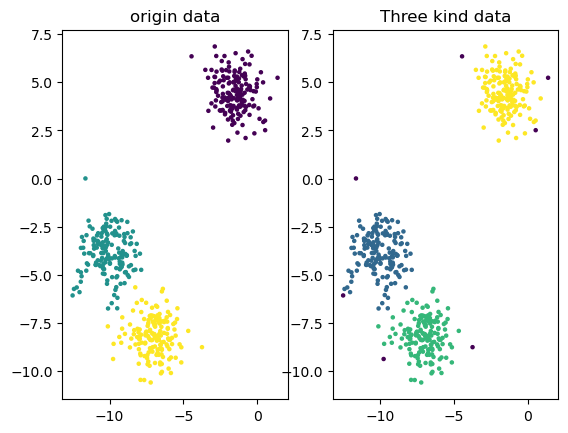

In [138]:
fig = plt.figure()   

ax1 = fig.add_subplot(121)  # 한 행을 2개로 나눠서 첫 번째 차트를 그릴 수 있는 axis 객체 
# ax1.set_title('origin data')    =>  plt.shoow() 안 쓸 거면 제목 달 때 이거 써줘야 함
plt.title('origin data')
scatter1 = ax1.scatter(X[:,0], X[:,1], c=y, s=5)


ax2 = fig.add_subplot(122)  # 한 행을 2개로 나눠서 두 번째 차트를 그릴 수 있는 axis 객체
plt.title('Three kind data')
scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, s=5)

plt.show()   # plt.show() 안 쓰면  plt.title() 이렇게 제목 쓰면 오류남
# plt.shoow() 안 쓸 거면 제목 달 때 ax1.set_title() 이거 써줘야 함

In [ ]:
# KMeans, KModes, DBSCAN
# 연속형, 범주형 데이터가 혼합되어 있는 데이터셋에 클러스터링(비지도학습)을 적용하려면?
# 자료형이 혼합된 데이터에 대해서 비유사도를 계산하여 매트릭스를 얻을 수 있다면?
# gower 모듈을 사용(비유사도 매트릭스를 DBSCAN에 전달해 분류)하면 혼합된 데이터의 비유사도 매트릭스를 구할 수 있다
# 비유사도 매트릭스(밀도 비슷한 값- 각 데이터간에 비유사도가 나와있으므로)를 DBSCAN에 전달하여 밀도기반 클러스터링 수행
# => 비슷한 이용자를 한 그룹으로 형성

### KMeans, KModes 및 DBSCAN은 모두 비지도 학습 알고리즘.

- KMeans: KMeans는 주어진 데이터를 지정된 클러스터 수(K)로 그룹화하는 클러스터링 알고리즘. 
    <br>각 클러스터의 중심(centroid)을 계산하고, 데이터 포인트를 가장 가까운 중심에 할당하여 클러스터를 형성함.
- KModes: KModes는 범주형 데이터에 특화된 클러스터링 알고리즘으로, 
    <br>주어진 범주형 변수들을 기반으로 데이터를 그룹화함. 각 클러스터는 대표적인 범주값(mode)을 가지며, 
    <br>각 데이터 포인트는 해당하는 클러스터에 할당됨.
- DBSCAN: DBSCAN은 밀도 기반의 클러스터링 알고리즘으로, 주변 밀도가 높은 데이터 포인트들을 하나의 클러스터로 그룹화함. 
    <br>이상치(outlier)와 밀집된 지역(dense region)을 구분할 수 있으며, 군집의 개수를 사전에 지정할 필요가 없음.

### Gower 모듈

- Gower 거리(Gower distance)는 연속형과 범주형 데이터가 혼합된 데이터에 대해 거리를 계산하는 방법 중 하나. 
- Gower 거리는 연속형 변수 간의 유클리드 거리와 범주형 변수 간의 매칭 여부를 고려하여 데이터 간의 유사성을 측정.

-  Gower 모듈은 Python에서 Gower 거리를 계산하기 위한 도구로 사용될 수 있음. 
-  이 모듈은 다양한 변수 유형(연속형, 범주형, 이진 등)을 처리하고 Gower 거리 행렬을 생성하는 기능을 제공. 
-  연속형과 범주형 변수가 혼합된 데이터에 대해 KMeans, KModes 및 DBSCAN과 같은 클러스터링 알고리즘에 
<br>Gower 모듈을 사용하여 입력 데이터로 활용할 수 있음.

- Gower 모듈은 gower.gower_matrix() 함수를 통해 입력 데이터프레임 또는 배열에서 Gower 거리 행렬을 생성. 
이후 생성된 행렬은 클러스터링 알고리즘에 적용될 수 있음.

```
예)

import gower

# 입력 데이터프레임에서 필요한 열만 선택하여 gower_matrix() 함수에 전달
distance_matrix = gower.gower_matrix(df[['continuous_var1', 'continuous_var2', 'categorical_var']], weight=None)

# KMeans, KModes 또는 DBSCAN 등의 클러스터링 알고리즘에 distance_matrix를 활용하여 클러스터링 수행
```

- 위 코드에서 df는 입력 데이터프레임이며, 
<br>'continuous_var1', 'continuous_var2', 'categorical_var'는 연속형 및 범주형 변수 열의 이름. 
<br>gower.gower_matrix() 함수를 사용하여 Gower 거리 행렬(distance_matrix)을 생성하고, 
<br>이를 원하는 클러스터링 알고리즘에 적용할 수 있음.

- weight=None : weight 매개변수는 Gower 거리 계산 시 각 변수의 가중치를 지정하는 데 사용됨. 
<br>기본적으로 weight=None으로 설정되어 있으며, 이는 모든 변수에 동일한 가중치를 부여함을 의미.
<br>만약 weight 매개변수에 사용자 정의 가중치를 제공하고 싶다면, 
<br>weight 인자에 변수 이름과 해당 변수의 가중치 값을 딕셔너리 형태로 전달할 수 있음. 

    <br>예를 들어, 연속형 변수와 범주형 변수에 대해 다른 가중치를 부여하려면 다음과 같이 작성:
```
weights = {'continuous_var1': 0.5, 'continuous_var2': 0.5, 'categorical_var': 1.0}
distance_matrix = gower.gower_matrix(df[['continuous_var1', 'continuous_var2', 'categorical_var']], weight=weights)
```
- 위 코드에서 'continuous_var1', 'continuous_var2', 'categorical_var'는 데이터프레임에서 사용되는 열 이름.
<br>weights 딕셔너리에서 연속형 변수인 'continuous_var1', 'continuous_var2'에는 0.5의 가중치가 할당되고, 
<br>범주형 변수인 'categorical_var'에는 1.0의 가중치가 할당됨.
<br>Gower 거리 계산 시 각각의 변수에 다른 중요도 또는 유사성을 반영하고 싶다면
<br>weight 매개변수를 사용하여 적절한 가중치를 지정할 수 있음. 
<br>만약 모든 변수가 동일한 중요도를 갖는다면 weight=None(기본값)으로 설정하여 모든 변수에 동일한 가중치가 적용됨.

In [4]:
# gower  모듈 설치
!pip install gower

In [107]:
# 이용자 정보로 된 연속형, 범주형으로 되어 있는 혼합 데이터 생성 (보통의 데이터 상태가 이러함) 

customers = {
    'age':[22,25,30,34,45,34,50,47,59,62],
    'gender':['m','m','f','m','f','m','f','f','m','f'],
    'marriage':['y','n','n','y','y','n','y','y','n','y'],
    'salary':[3400,3500,4300,3900,4020,4800, 5030,2900,4500,3400],
    'children':[True, False,False,True,True,False,True,False,True,False],
    'purchase_type':['low','low','low','heavy','heavy','low','heavy','low','heavy','low']
}

# 이걸 기반으로 비유사도 매트릭스를 gower 모듈을 이용해 만듬

In [109]:
# 위 데이터를 데이터 프레임으로 표시. 딕셔너리라 만들기는 어렵지 않음
import pandas as pd
df = pd.DataFrame(customers)
df

,age,gender,marriage,salary,children,purchase_type
0,22,m,y,3400,True,low
1,25,m,n,3500,False,low
2,30,f,n,4300,False,low
3,34,m,y,3900,True,heavy
4,45,f,y,4020,True,heavy
5,34,m,n,4800,False,low
6,50,f,y,5030,True,heavy
7,47,f,y,2900,False,low
8,59,m,n,4500,True,heavy
9,62,f,y,3400,False,low


In [110]:
# 이 데이터 프레임을 gower 모듈에 줘서 비유사도 매트릭스 만들어 내게끔 함(gower가 비유사도 계산을 함)
import gower
gower_matrix = gower.gower_matrix(df)
gower_matrix.shape   # 만들어진 매트릭스 데이터 형태 확인 : (10, 10) / 10행 10열로 되어 있음 =>  한 사람당 10명과 각 비교하므로
# 즉, 한 사람이 10개의 컬럼과 10개의 행을 가진 매트릭스가 만들어지게 됨(행 수 만큼의 행과 행 수만큼의 열이 생성됨)
# 비유사도 계산이므로 위 데이터에서는 숫자 age 빼고 비교하여 비유사도 계산해줌


# 데이터 프레임은 (10, 6)의 형태를 가지고 있는 것이고 
# Gower 거리 메트릭스는 각 관측치 간의 거리를 계산하는 메트릭스이므로,
# 데이터 프레임에 있는 행의 개수에 따라 결과 메트릭스의 크기가 결정됨. 
# 데이터 프레임에 10개의 행이 있다면 각 행 간의 거리를 계산하기 위해 (10, 10) 크기의 메트릭스가 생성됨. 
# 각 행은 다른 모든 행과의 거리를 측정하게 되므로 결과 메트릭스의 크기가 (10, 10)이 됨.
# Gower 거리 메트릭스의 결과가 (10, 10)인 것입니다. 데이터 프레임 df에는 10개의 관측치(행)와 6개의 변수(열)이 있으므로, 
# Gower 거리 메트릭스는 10개의 관측치 간의 거리를 계산한 것임.
# 따라서 Gower 거리 메트릭스의 결과가 (10, 10)인 것은 데이터 프레임 df에 있는 10개의 관측치 간의 거리를 포함하고 있음을 나타냄. 
# 이 메트릭스는 각 관측치 쌍 간의 Gower 거리를 나타내며, 
# 데이터 간의 유사성 또는 거리를 측정하는 데 사용됨.
# 데이터 프레임 df에는 10개의 고객 정보가 있으며, 
# Gower 거리 메트릭스는 각 고객 간의 유사성을 측정하기 위해 사용되었으며, 따라서 10x10 행렬로 표현되었음.

(10, 10)

In [111]:
gower_matrix   # 비유사도가 0인 것은 자기 자신 / 첫 번째 사람은 0.2557903와 가장 유사(비유사도가 가장 낮으므로)

array([[0.        , 0.35365805, 0.6037559 , 0.2557903 , 0.47767997,
        0.4928795 , 0.577543  , 0.47662362, 0.573572  , 0.5       ],
       [0.35365805, 0.        , 0.2500978 , 0.5687989 , 0.7906886 ,
        0.13922144, 0.8905516 , 0.47194836, 0.5532473 , 0.49532473],
       [0.6037559 , 0.2500978 , 0.        , 0.7146322 , 0.58440924,
        0.22245696, 0.6404538 , 0.34704617, 0.6364828 , 0.37042254],
       [0.2557903 , 0.5687989 , 0.7146322 , 0.        , 0.22188967,
        0.57042253, 0.32175273, 0.6324139 , 0.3177817 , 0.65579027],
       [0.47767997, 0.7906886 , 0.58440924, 0.22188967, 0.        ,
        0.77353287, 0.09986307, 0.42930362, 0.42922536, 0.45267996],
       [0.4928795 , 0.13922144, 0.22245696, 0.57042253, 0.77353287,
        0.        , 0.7513302 , 0.5361698 , 0.4609742 , 0.5595462 ],
       [0.577543  , 0.8905516 , 0.6404538 , 0.32175273, 0.09986307,
        0.7513302 , 0.        , 0.5125    , 0.41230437, 0.51087636],
       [0.47662362, 0.47194836, 0.3470461

In [113]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='precomputed') # eps=0.5, min_samples=2를 임의로 지정
# metric은 측정 도구를 의미함. gower distance는 이미 위에서 나왔으므로 여기선 거리가 필요 없어 'precomputed'를 씀
# 'precomputed' => 미리 계산됐다는 의미
# 비유사도와 거리는 흡사해 dlstance라고 하는 것
df_gower = pd.DataFrame(gower_matrix)
dbscan.fit(df_gower)

dbscan.labels_  # 결과가 한 그룹으로 나옴

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [114]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2, metric='precomputed') 
# metric은 측정 도구 gower distance는 이미 나왔으므로 여기선 필요 없어 'precomputed'를 씀
df_gower = pd.DataFrame(gower_matrix)
dbscan.fit(df_gower)

dbscan.labels_    # array([ 0,  1,  1,  0,  0,  1,  0,  2, -1,  2], dtype=int64) => noise -1
# 가급적 노이즈가 없도록 파라미터 값을 조정해야 함 [추천시스템 등 이용시 노이즈가 제외되지 않도록]

array([ 0,  1,  1,  0,  0,  1,  0,  2, -1,  2], dtype=int64)

In [115]:
# 이용자별로 분류된 그룹도 데이트 프레임에 표기
df['cluster'] = dbscan.labels_
df 

,age,gender,marriage,salary,children,purchase_type,cluster
0,22,m,y,3400,True,low,0
1,25,m,n,3500,False,low,1
2,30,f,n,4300,False,low,1
3,34,m,y,3900,True,heavy,0
4,45,f,y,4020,True,heavy,0
5,34,m,n,4800,False,low,1
6,50,f,y,5030,True,heavy,0
7,47,f,y,2900,False,low,2
8,59,m,n,4500,True,heavy,-1
9,62,f,y,3400,False,low,2


In [ ]:
# 위와 같이 분류만 해주면 분류된 것을 sql에 디비로 넣어 놓고 이 이용자 정보를 가지고 그룹별로 이용해 뭘 추천할지를 결정 
# 분류된 데이터베이스를 이용해 데이터 프레임으로 만들어 csv 파일 또는 파이썬 이용해 가공 가능

In [ ]:
# 머신러닝을 위한 사이킷런은 아나콘다에서 제공되는 모듈이나 
# 딥러닝은 아나콘다에 없고 구글에서 만든 인경신경망 이론 이용